In [1]:
# to make interactive plotting possible
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [58]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [6]:
# make plots a bit nicer
plt.matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [31]:
# specify paths
path_project = "../" # TODO: correct !
path_project = "../classification/"
path_log = os.path.join(path_project, "experiments")
path_save = os.path.join(path_project, "materials", "fig")

In [112]:
# save images or not
make_save = True

In [84]:
def parse_log_file(file_log):
    parse_res = {}
    
    if file_log.find('iter') != -1:
        content_types = (int, float, str)
    elif file_log.find('epoch') != -1:
        content_types = (int, float, float, float, float, str)
    
    with open(file_log, 'r') as f:
        content = f.readlines()
    
    content_tile = content[0].strip().split()
    content = [x.strip().split() for x in content[1:]] 
    content_np = np.array(content)
    
    for i in range(len(content_types)):
        parse_res[content_tile[i]] = content_np[:, i].astype(content_types[i])
    
    return parse_res

In [101]:
num_expr = 1
expr_name = "e" + str(num_expr).zfill(4)
file_log_epoch = os.path.join(path_log, expr_name + "_log_epoch.txt")
file_log_iter = os.path.join(path_log, expr_name + "_log_iter.txt")

In [88]:
data_epoch = parse_log_file(file_log_epoch)
data_iter = parse_log_file(file_log_iter)

In [90]:
print(data_iter.keys())
print(data_epoch.keys())

dict_keys(['iter', 'loss', 'elapsed_time'])
dict_keys(['epoch', 'avg_acc_train', 'avg_loss_train', 'avg_acc_val', 'avg_loss_val', 'elapsed_time'])


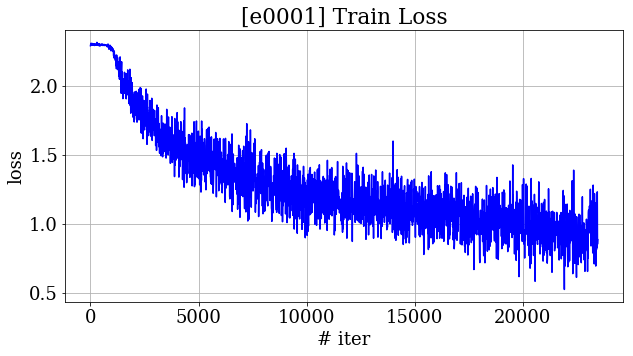

In [119]:
plt.figure(figsize=(10, 5))
plt.plot(data_iter['iter'], data_iter['loss'], 'b')

plt.xlabel('# iter')
plt.ylabel('loss')
plt.title('[' + expr_name + '] Train Loss')
plt.grid()

if make_save:
    file_save = os.path.join(path_save, expr_name + "_loss_iter.png")
    plt.savefig(file_save)

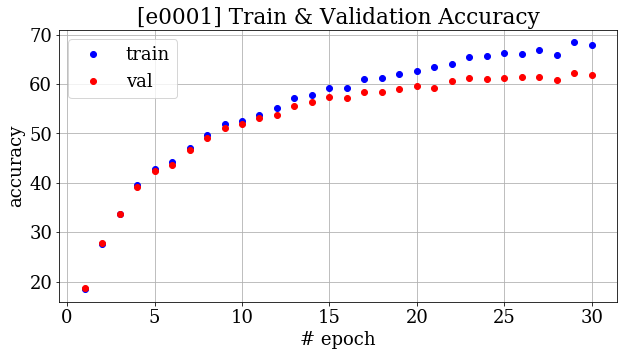

In [116]:
plt.figure(figsize=(10, 5))
plt.plot(data_epoch['epoch'], data_epoch['avg_acc_train'], 'ob', label="train")
plt.plot(data_epoch['epoch'], data_epoch['avg_acc_val'], 'or', label="val")

plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('[' + expr_name + '] Train & Validation Accuracy')
plt.grid()

if make_save:
    file_save = os.path.join(path_save, expr_name + "_acc_epoch.png")
    plt.savefig(file_save)

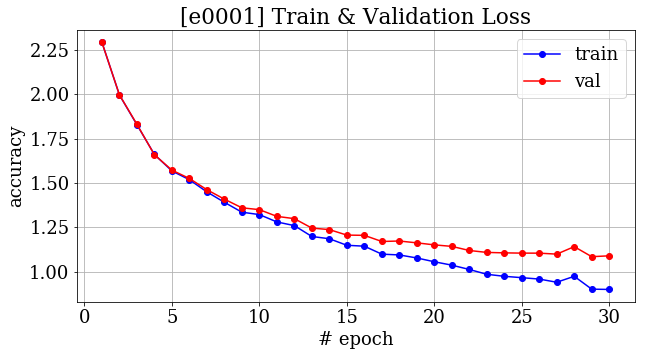

In [117]:
plt.figure(figsize=(10, 5))
plt.plot(data_epoch['epoch'], data_epoch['avg_loss_train'], '-ob', label="train")
plt.plot(data_epoch['epoch'], data_epoch['avg_loss_val'], '-or', label="val")

plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('[' + expr_name + '] Train & Validation Loss')
plt.grid()

if make_save:
    file_save = os.path.join(path_save, expr_name + "_loss_epoch.png")
    plt.savefig(file_save)